In [21]:
import pip
# pip.main(['install', '{insert_pckg_here}'])
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Training/Testing Data:

In [22]:
train_url = 'https://raw.githubusercontent.com/mturner49/pylovers-final-project/dev/data/train.csv'
test_url = 'https://raw.githubusercontent.com/mturner49/pylovers-final-project/dev/data/test.csv'

training_set = pd.read_csv(train_url, low_memory=False, error_bad_lines=False, index_col='Id')
testing_set = pd.read_csv(test_url, low_memory=False, error_bad_lines=False, index_col='Id')

train_df = pd.DataFrame(training_set)
test_df = pd.DataFrame(testing_set)

train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
# replace null values in df w/ values that had most counts for each column
train_df = train_df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' \
                          else x.fillna(train_df.columns.value_counts().idxmax()))
test_df = test_df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' \
                          else x.fillna(train_df.columns.value_counts().idxmax()))
# combining the training and test dfs
# dfs = [train_df, test_df]
# df = pd.concat(dfs)

# df.head()

## Data Preprocessing:

In [24]:
# encode object (categorical) columns in df
enc_df = train_df.select_dtypes(include=['object']).apply(LabelEncoder().fit_transform)

# add encoded columns back into original train df
train_df[enc_df.columns] = enc_df
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,1,3,3,0,4,...,0,3,2,1,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,1,3,3,0,2,...,0,3,2,1,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,1,0,3,0,4,...,0,3,2,1,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,1,0,3,0,0,...,0,3,2,1,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,1,0,3,0,2,...,0,3,2,1,0,12,2008,8,4,250000


In [19]:
#print(train_df.MSZoning)

#df = train_df.groupby('MSZoning').size()
#print (df)

# Converting category labels to numerical values for MSZoning column
train_df['MSZoning_Num'] = train_df.MSZoning.map(
{'C (all)': 1,
 'FV': 2,
 'RH': 3,
 'RL': 4,
 'RM': 5})

#print(train_df.MSZoning_Num)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,1,3,3,0,4,...,0,3,2,1,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,1,3,3,0,2,...,0,3,2,1,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,1,0,3,0,4,...,0,3,2,1,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,1,0,3,0,0,...,0,3,2,1,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,1,0,3,0,2,...,0,3,2,1,0,12,2008,8,4,250000


In [5]:
#print(train_df.LotConfig)

#df = train_df.groupby('LotConfig').size()
#print (df)

# Converting category labels to numerical values for LotConfig column
train_df['LotConfig_Num'] = train_df.LotConfig.map(
{'Corner': 1,
 'CulDSac': 2,
 'FR2': 3,
 'FR3': 4,
 'Inside': 5})

#print(train_df.LotConfig_Num)    

In [6]:
#print(train_df.Neighborhood)

#df = train_df.groupby('Neighborhood').size()
#print (df)

# Converting category labels to numerical values for Neighborhood column
train_df['Neighborhood_Num'] = train_df.Neighborhood.map(
{'Blmngtn': 1,
 'Blueste': 2,
 'BrDale': 3,
 'BrkSide': 4,
 'ClearCr': 5,
 'CollgCr': 6,
 'Crawfor': 7,
 'Edwards': 8,
 'Gilbert': 9,
 'IDOTRR':  10,
 'MeadowV': 11,
 'Mitchel': 12,
 'NAmes': 13,
 'NPkVill': 14,
 'NWAmes': 15,
 'NoRidge': 16,
 'NridgHt': 17,
 'OldTown': 18,
 'SWISU': 19,
 'Sawyer': 20,
 'SawyerW': 21,
 'Somerst': 22,
 'StoneBr': 23,
 'Timber': 24,
 'Veenker': 25})

#print(train_df.Neighborhood_Num)

In [7]:
#print(train_df.KitchenQual)

#df = train_df.groupby('KitchenQual').size()
#print (df)

# Converting category labels to numerical values for KitchenQual column
train_df['KitchenQual_Num'] = train_df.KitchenQual.map(
{'Po':1, 
 'Fa':2, 
 'TA':3, 
 'Gd':4, 
 'Ex':5})

#print(train_df.KitchenQual_Num)

In [8]:
#print(train_df.SaleCondition)

#df = train_df.groupby('SaleCondition').size()
#print (df)

# Converting category labels to numerical values for SaleCondition column
train_df['SaleCondition_Num'] = train_df.SaleCondition.map(
{'Abnorml':1, 
 'AdjLand':2, 
 'Alloca':3, 
 'Family':4, 
 'Normal':5,
 'Partial':6})

#print(train_df.SaleCondition_Num)

## Data Exploration:

In [39]:
# looking at correlation of numeric features to SalePrice column. 
# this will suggest which columns have a greater relationship with the SalePrice column 
corr = train_df.corr().abs().unstack().sort_values(ascending=False)['SalePrice']
corr = corr.iloc[1:]
corr.head(40)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
ExterQual        0.636884
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BsmtQual         0.593734
KitchenQual      0.589189
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageFinish     0.425684
GarageType       0.415283
HeatingQC        0.400178
BsmtFinSF1       0.386420
Foundation       0.382479
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
BsmtExposure     0.274589
LotArea          0.263843
GarageYrBlt      0.261366
LotShape         0.255580
CentralAir       0.251328
GarageCond       0.246705
Electrical       0.236391
PavedDrive       0.231357
BsmtFullBath     0.227122
RoofStyle        0.222405
BsmtUnfSF        0.214479
SaleCondition    0.213092
Neighborhood     0.210851
LotFrontage      0.209624
GarageQual  

Text(0.5, 1.0, 'Price vs Overall Quality')

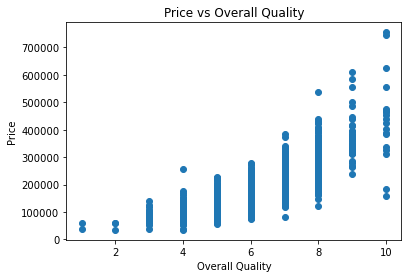

In [44]:
# show how sales price varies with overall quality
plt.scatter(train_df.OverallQual, train_df.SalePrice)
plt.xlabel("Overall Quality")
plt.ylabel('Price')
plt.title("Price vs Overall Quality")

Text(0.5, 1.0, 'Price vs Garage Size')

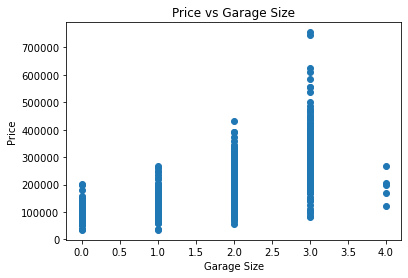

In [45]:
# show how sales price varies with garage size in car capacity
plt.scatter(train_df.GarageCars, train_df.SalePrice)
plt.xlabel("Garage Size")
plt.ylabel('Price')
plt.title("Price vs Garage Size")

Text(0.5, 1.0, 'Price vs GrLivArea')

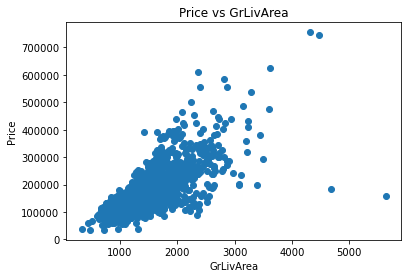

In [46]:

plt.scatter(train_df.GrLivArea, train_df.SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel('Price')
plt.title("Price vs GrLivArea")

## Data Visualization (CAN BE DELETED):

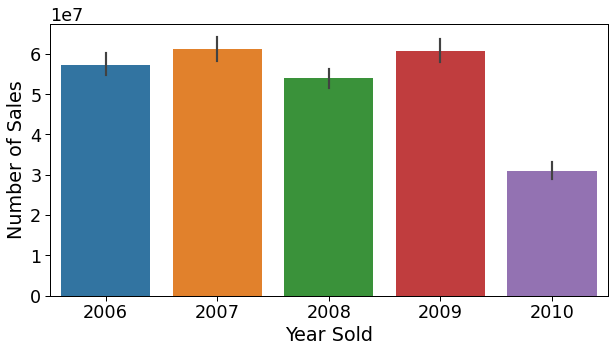

In [10]:
#Count the number of houses sold in a year
#year_sold_pivot = train_df.pivot_table(index='YrSold', values='SalePrice', aggfunc='count')
#print(year_sold_pivot)

# Plotting the sum of sales per year
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(10,5))
sns.barplot(x='YrSold', y='SalePrice', data=train_df[['SalePrice', 'YrSold']], estimator=sum)
plt.xlabel('Year Sold')
plt.ylabel('Number of Sales')
plt.show()

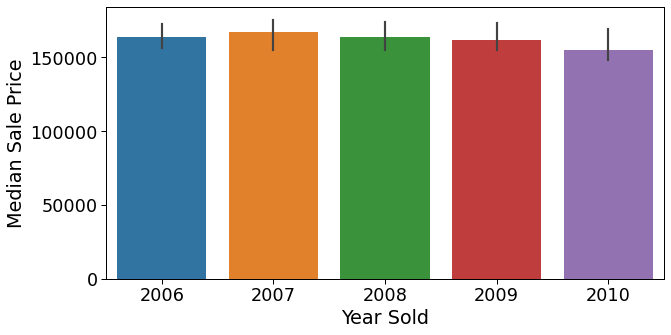

In [11]:
# Plotting the median sale price for each year

#Checking the median price
#year_sold_pivot = train_df.pivot_table(index='YrSold', values='SalePrice', aggfunc=np.median)
#print(year_sold_pivot)

sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(10,5))
sns.barplot(x='YrSold', y='SalePrice', data=train_df[['SalePrice', 'YrSold']], estimator=np.median)
plt.xlabel('Year Sold')
plt.ylabel('Median Sale Price')
plt.show()

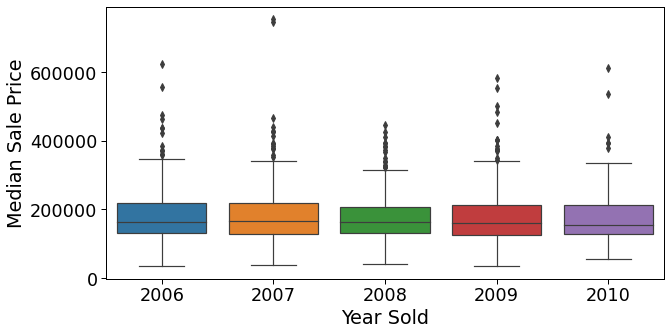

In [12]:
#Displaying the median price for each year using box plot.  
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(10,5))
sns.boxplot(x='YrSold', y='SalePrice', data=train_df[['SalePrice', 'YrSold']])
plt.xlabel('Year Sold')
plt.ylabel('Median Sale Price')
plt.show()

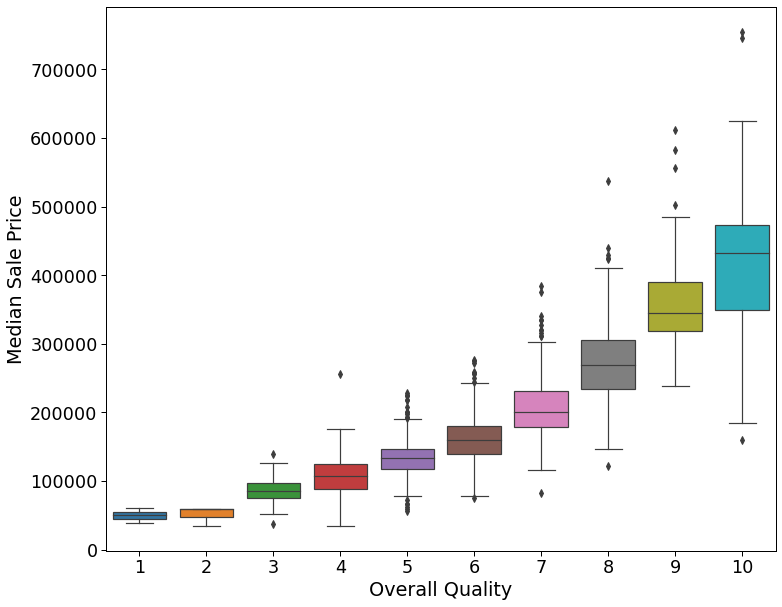

In [13]:
#Displaying the median price based on overall quality of the house using box plot.
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(12,10))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df[['SalePrice', 'OverallQual']])
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.show()

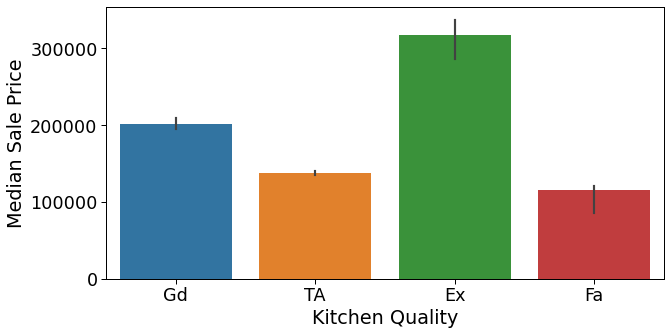

In [14]:
# Plotting the median sale price based on kitchen quality
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(10,5))
sns.barplot(x='KitchenQual', y='SalePrice', data=train_df[['SalePrice', 'KitchenQual']], estimator=np.median)
plt.xlabel('Kitchen Quality')
plt.ylabel('Median Sale Price')
plt.show()

## Feature Engineering:

In [15]:
# Ratio of Basement Quality ['BsmtQual'] to Overall Quality ['OverallQual']

In [16]:
# Ratio of Exterior Quality ['ExterQual'] to Overall Quality ['OverallQual']

In [17]:
# Ratio of Kitchen Quality ['KitchenQual'] to Overall Quality ['OverallQual']

In [18]:
################## DISREGARD LOGIC BELOW ######################

In [19]:
# encode object columns
# enc_df = train_df.select_dtypes(include=['object']).apply(LabelEncoder().fit_transform)
# enc_df

In [20]:
# add encoded columns back into train df
# train_df[enc_df.columns] = enc_df
# train_df

In [21]:
# normalize df except for price column
# norm_df = (train_df - train_df.mean()) / (train_df.max() - train_df.min())